<a href="https://colab.research.google.com/github/HASBI019/Muhammad-Hasbi-AS-ari_10222175_TM/blob/main/MHasbiA_10222175_TM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 UTS Text Classification / Topic Modeling

**Nama:** Muhammad Hasbi As’Ari  
**NIM:** (10222175)  
**Kelas:** (IF-VII-A)

## Penjelasan Dataset yang digunakan

##1. Kasus yang diambil

Dataset ini digunakan untuk melakukan analisis topik (Topic Modeling) terhadap teks keluhan pelanggan yang terdapat pada data customer support tickets.
Kasus ini diambil untuk mengetahui pola dan kategori utama permasalahan pelanggan seperti kendala login, refund, pengiriman produk, atau kendala teknis lainnya.

Dengan melakukan topic modeling, kita bisa menemukan kelompok topik tersembunyi (latent topics) dari ribuan teks keluhan pelanggan tanpa perlu memberi label secara manual.
Hasilnya bisa membantu perusahaan memahami tren permasalahan pelanggan dan menentukan prioritas perbaikan layanan.

### 2. Penjelasan setiap kolomnya

Dataset `customer_support_tickets.csv` berisi data tiket layanan pelanggan yang mencakup informasi pelanggan, produk yang dibeli, serta detail keluhan yang diajukan.  
Berikut penjelasan setiap kolomnya:

| Nama Kolom | Deskripsi |
|-------------|------------|
| **Ticket ID** | Nomor unik yang mengidentifikasi setiap tiket pelanggan. |
| **Customer Name** | Nama pelanggan yang mengajukan tiket keluhan. |
| **Customer Email** | Alamat email pelanggan untuk keperluan komunikasi. |
| **Customer Age** | Usia pelanggan yang mengajukan tiket. |
| **Customer Gender** | Jenis kelamin pelanggan (Male, Female, Other). |
| **Product Purchased** | Nama produk yang dibeli oleh pelanggan. |
| **Date of Purchase** | Tanggal pembelian produk oleh pelanggan. |
| **Ticket Type** | Jenis permasalahan atau kategori tiket (misal: *Technical issue*, *Billing inquiry*, dll). |
| **Ticket Subject** | Judul singkat atau ringkasan dari permasalahan pelanggan. |
| **Ticket Description** | Uraian lengkap atau teks utama dari keluhan pelanggan (kolom utama yang digunakan untuk analisis topik). |
| **Ticket Status** | Status penanganan tiket (misal: *Closed*, *Pending Customer Response*). |
| **Resolution** | Penjelasan singkat mengenai solusi atau tindak lanjut yang diberikan. |
| **Ticket Priority** | Tingkat prioritas tiket (misal: *Critical*, *High*, *Low*). |
| **Ticket Channel** | Media atau saluran pelanggan mengajukan tiket (misal: *Email*, *Chat*, *Social Media*). |
| **First Response Time** | Waktu respon pertama dari pihak dukungan pelanggan. |
| **Time to Resolution** | Waktu total yang dibutuhkan hingga tiket diselesaikan. |
| **Customer Satisfaction Rating** | Penilaian tingkat kepuasan pelanggan terhadap penanganan tiket (skala numerik). |

> Untuk analisis **Topic Modeling**, kolom yang digunakan adalah **Ticket Description**, karena berisi teks keluhan pelanggan yang dapat dikelompokkan berdasarkan kesamaan topik.



# 3. IMPORT LIBRARY


In [49]:
import pandas as pd
import numpy as np

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [51]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [52]:
# Vektorisasi teks
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [53]:
from sklearn.decomposition import LatentDirichletAllocation, NMF

In [54]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [55]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### 4. Load Data  
Pada bagian ini, dataset `customer_support_tickets.csv` akan dimuat ke dalam DataFrame menggunakan library **pandas**, kemudian ditampilkan 5 baris pertama untuk memastikan data terbaca dengan benar.


In [56]:
df = pd.read_csv("customer_support_tickets.csv")

In [57]:
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


## Data Understanding

# 1. Jumlah baris data

In [58]:
print("Jumlah baris data:", len(df))
print("Jumlah kolom:", len(df.columns))

Jumlah baris data: 8469
Jumlah kolom: 17


# 2. Panjang rata-rata teks di kolom 'Ticket Description'

In [59]:
df['text_length'] = df['Ticket Description'].astype(str).apply(len)
print("Panjang rata-rata teks:", df['text_length'].mean())

Panjang rata-rata teks: 289.82193883575394


# 3. Cek data duplikasi

In [60]:
duplikat = df.duplicated().sum()
print("Jumlah data duplikat:", duplikat)

Jumlah data duplikat: 0


# 4. Cek data kosong (missing values)

In [61]:
print("Jumlah data kosong per kolom:")
print(df.isnull().sum())

Jumlah data kosong per kolom:
Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
text_length                        0
dtype: int64


# 5. Visualisasi kata yang sering muncul

In [62]:
# Gabungkan semua teks dari kolom Ticket Description
all_text = ' '.join(df['Ticket Description'].astype(str))

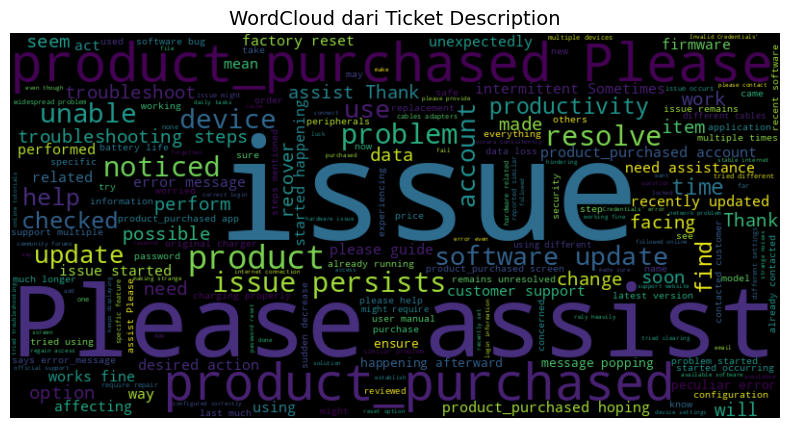

In [63]:
# Buat wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud dari Ticket Description", fontsize=14)
plt.show()

# Visualisasi frekuensi kata paling sering muncul

In [64]:
from collections import Counter
import re

# Tokenisasi sederhana: pisahkan kata dan ubah ke huruf kecil
tokens = re.findall(r'\b\w+\b', all_text.lower())

In [65]:
# Hitung frekuensi kata
word_freq = Counter(tokens)

In [66]:
# Ambil 10 kata paling sering muncul
common_words = word_freq.most_common(10)

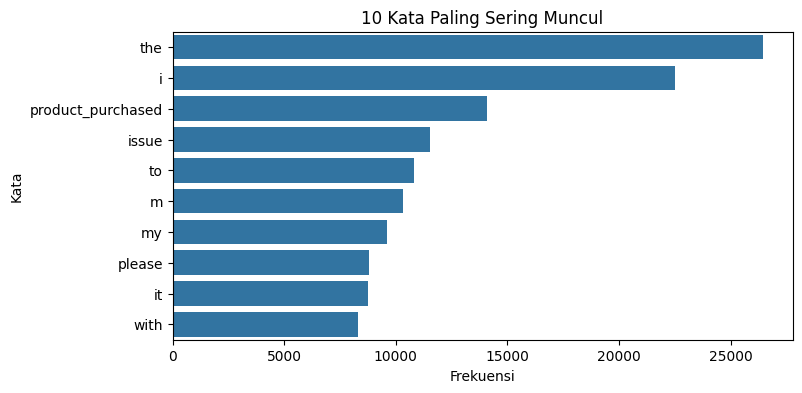

In [67]:
# Visualisasi bar chart
words, counts = zip(*common_words)
plt.figure(figsize=(8, 4))
sns.barplot(x=list(counts), y=list(words))
plt.title("10 Kata Paling Sering Muncul")
plt.xlabel("Frekuensi")
plt.ylabel("Kata")
plt.show()

## Data Text Processing

In [68]:
import nltk
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [69]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [70]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [71]:
def preprocess_text(text):
    # 1. Case folding
    text = text.lower()

    # 2. Remove punctuation dan angka
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. Tokenisasi
    tokens = nltk.word_tokenize(text)

    # 4. Stopword removal
    tokens = [word for word in tokens if word not in stop_words]

    # 5. Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # 6. Stemming
    tokens = [stemmer.stem(word) for word in tokens]

    return ' '.join(tokens)


In [72]:
df['clean_text'] = df['Ticket Description'].astype(str).apply(preprocess_text)
df[['Ticket Description', 'clean_text']].head()


,Ticket Description,clean_text
0,I'm having an issue with the {product_purchase...,im issu productpurchas pleas assist bill zip c...
1,I'm having an issue with the {product_purchase...,im issu productpurchas pleas assist need chang...
2,I'm facing a problem with my {product_purchase...,im face problem productpurchas productpurchas ...
3,I'm having an issue with the {product_purchase...,im issu productpurchas pleas assist problem yo...
4,I'm having an issue with the {product_purchase...,im issu productpurchas pleas assist note selle...


In [73]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['clean_text'])

In [74]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

In [75]:
tfidf_df.iloc[:, :10].head()

,aaron,ab,abc,abil,abl,aboutum,abovement,abovethen,abroad,absmith
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
# CountVectorizer
cv = CountVectorizer()
cv_matrix = cv.fit_transform(df['clean_text'])
print("CountVectorizer shape:", cv_matrix.shape)

# TF-IDF Vectorizer
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['clean_text'])
print("TF-IDF shape:", tfidf_matrix.shape)


CountVectorizer shape: (8469, 5475)
TF-IDF shape: (8469, 5475)


In [77]:
# 1. Tokenisasi
# 2. Lemmatization
# 3. Stemming
# 4. Stopword removal (Tanda baca, angka dan kata)
# 5. Text Normalisasi
# 6. Matrix correlation (opsional)
# 7. Text Vektorisasi

## Data Modeling

# Model yang digunakan: Latent Dirichlet Allocation (LDA)

Model LDA (Latent Dirichlet Allocation) merupakan salah satu teknik **unsupervised learning**
yang digunakan untuk menemukan *hidden topics* di dalam kumpulan dokumen teks.

Prinsip dasarnya:
- Setiap dokumen dianggap sebagai campuran dari beberapa topik.
- Setiap topik diwakili oleh sekumpulan kata dengan probabilitas tertentu.

Dengan LDA, kita bisa mengelompokkan teks ke dalam beberapa tema seperti “Customer Complaint”,
“Technical Issue”, atau “Payment Problem” tanpa label sebelumnya.


#Implementasi LDA Topic Modeling

In [78]:
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf_matrix)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopik {topic_idx+1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, tfidf.get_feature_names_out(), 10)



Topik 1:
perform, productpurchas, pleas, didnt, problem, im, reset, resolv, action, option

Topik 2:
notic, productpurchas, issu, error, say, data, work, mean, messag, ive

Topik 3:
issu, productpurchas, pleas, im, ive, assist, persist, tri, troubleshoot, product

Topik 4:
ensur, secur, concern, safe, access, like, im, productpurchas, would, account

Topik 5:
updat, start, recent, issu, productpurchas, might, havent, happen, relat, firmwar


#Visualisasi Topik dalam Bentuk DataFrame

In [79]:
import pandas as pd

# Ambil kata-kata top per topik
topics = []
for idx, topic in enumerate(lda.components_):
    top_features = [tfidf.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]]
    topics.append({'Topik': f'Topic {idx+1}', 'Top 10 Kata': ', '.join(top_features)})

topics_df = pd.DataFrame(topics)
topics_df


,Topik,Top 10 Kata
0,Topic 1,"perform, productpurchas, pleas, didnt, problem..."
1,Topic 2,"notic, productpurchas, issu, error, say, data,..."
2,Topic 3,"issu, productpurchas, pleas, im, ive, assist, ..."
3,Topic 4,"ensur, secur, concern, safe, access, like, im,..."
4,Topic 5,"updat, start, recent, issu, productpurchas, mi..."


#Visualisasi Topik dengan Bar Chart

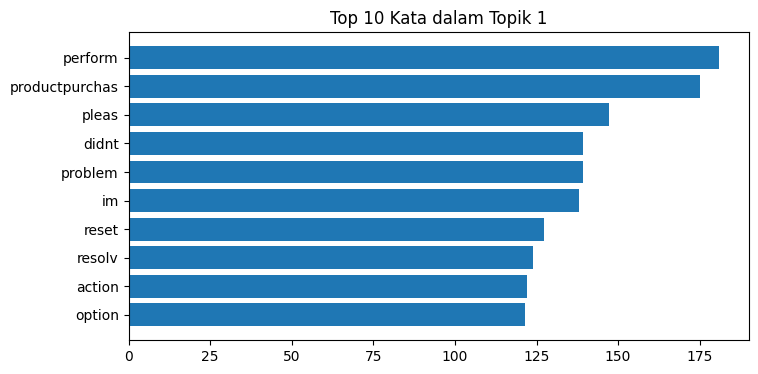

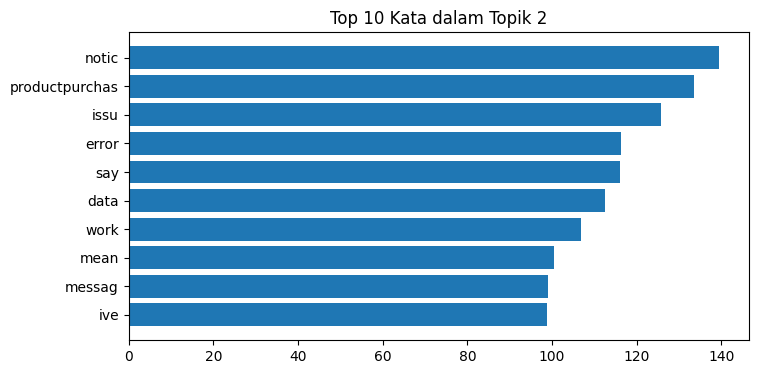

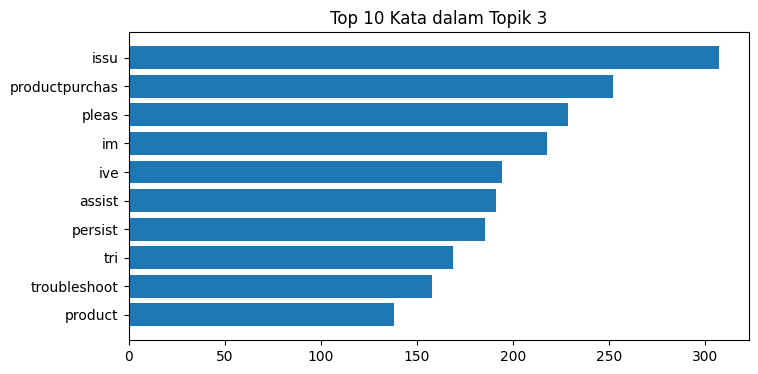

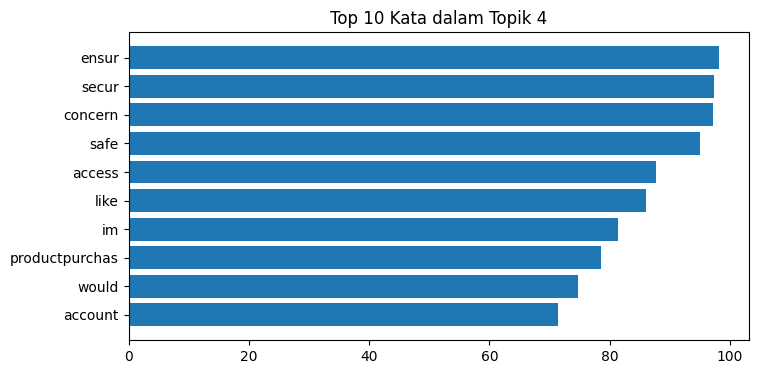

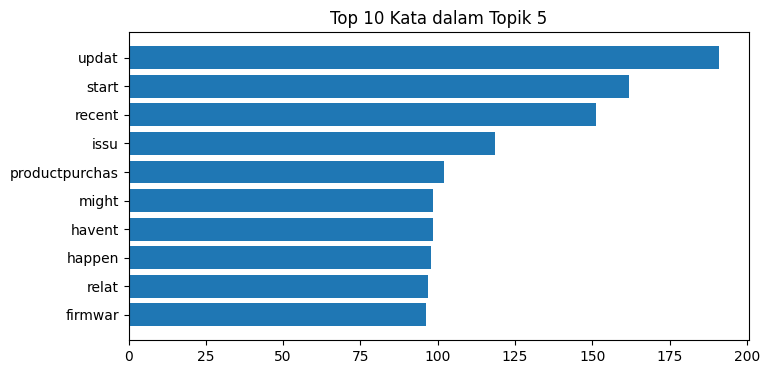

In [80]:
for idx, topic in enumerate(lda.components_):
    top_features_idx = topic.argsort()[:-11:-1]
    top_features = [tfidf.get_feature_names_out()[i] for i in top_features_idx]
    top_weights = topic[top_features_idx]

    plt.figure(figsize=(8,4))
    plt.barh(top_features, top_weights)
    plt.title(f"Top 10 Kata dalam Topik {idx+1}")
    plt.gca().invert_yaxis()
    plt.show()


## Visualisasi Lanjutan dengan PCA

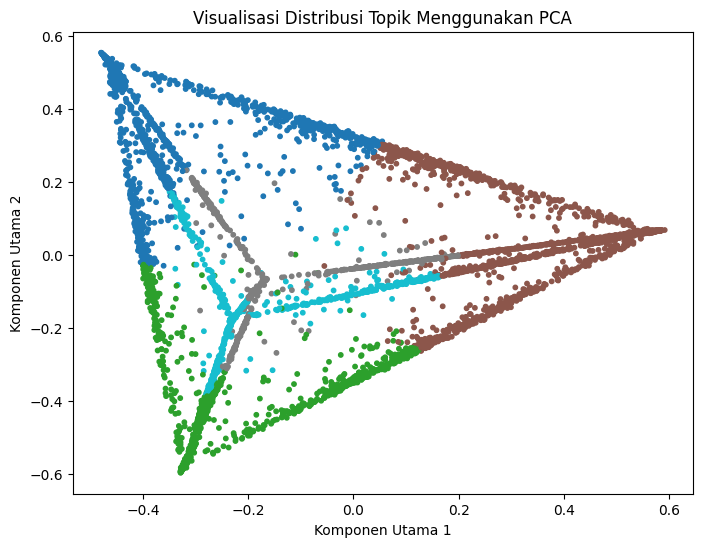

In [81]:
from sklearn.decomposition import PCA

lda_transformed = lda.transform(tfidf_matrix)

# Kurangi dimensi jadi 2D dengan PCA
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(lda_transformed)

# Visualisasi hasil PCA
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=lda_transformed.argmax(axis=1), cmap='tab10', s=10)
plt.title("Visualisasi Distribusi Topik Menggunakan PCA")
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.show()


## 🔧 Tambahan: Perbaikan Hasil Preprocessing (Stopword Lengkap)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


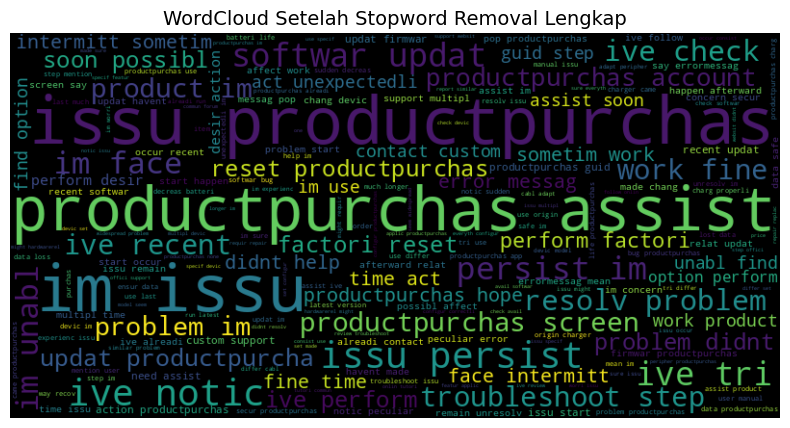

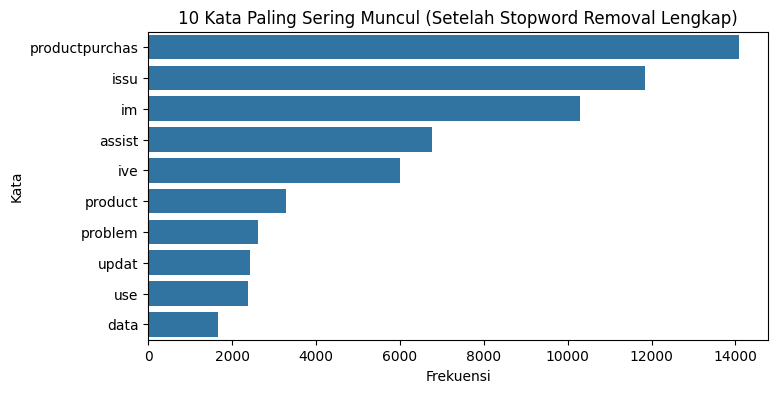

In [82]:
# ======================================================
# Tambahan dari Data Text Processing (Stopword Cleaning Fix)
# Tujuan: Membersihkan kata umum seperti "the", "is", "please"
# ======================================================

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
custom_stopwords = {
    'please', 'thank', 'thanks', 'hi', 'hello', 'regards',
    'the', 'is', 'are', 'be', 'was', 'were', 'can', 'will', 'shall', 'could'
}
stop_words.update(custom_stopwords)

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

# Terapkan ulang preprocessing
df['clean_text'] = df['Ticket Description'].astype(str).apply(preprocess_text)

# WordCloud setelah bersih
all_text = ' '.join(df['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud Setelah Stopword Removal Lengkap", fontsize=14)
plt.show()

# Bar chart kata paling sering
all_words = ' '.join(df['clean_text']).split()
common_words = Counter(all_words).most_common(10)
words, counts = zip(*common_words)

plt.figure(figsize=(8, 4))
sns.barplot(x=list(counts), y=list(words))
plt.title("10 Kata Paling Sering Muncul (Setelah Stopword Removal Lengkap)")
plt.xlabel("Frekuensi")
plt.ylabel("Kata")
plt.show()